# Exploratory Data Analysis with Netflix Movies and TV Shows Dataset

## Step 1: Imports and Reading Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [6]:
import os
import os

print("My current location:", os.getcwd())
print("\nFiles I can see here:", os.listdir())

My current location: /home/dimitri/code-wsl/ml-tutorials/edaNetflix

Files I can see here: ['data', 'Untitled.ipynb', '.ipynb_checkpoints']


In [12]:
# Load the data
df = pd.read_csv('data/netflix_titles.csv')

# Look at the first rows
df.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...


## Step 2: Understanding Data

Check the shape (rows x cols)

In [11]:
df.shape

(8807, 12)

In [13]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

Check the info (dtypes, non-null counts)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


Only one numeric column

In [17]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [23]:
df['type'].value_counts()

type
Movie      6131
TV Show    2676
Name: count, dtype: int64

In [21]:
df['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', nan,
       'TV-Y7-FV', 'UR'], dtype=object)

### Summary

* How many Netflix titles are in the dataset? 8807
* Are there more movies or TV shows? Movies

## Step 3: Data Preparation

In [25]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [28]:
df['date_added'].unique()

array(['September 25, 2021', 'September 24, 2021', 'September 23, 2021',
       ..., 'December 6, 2018', 'March 9, 2016', 'January 11, 2020'],
      dtype=object)

In [26]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

Since director has a lot of missing values (~30%), we replace it with placeholders not to lose data. We do the same with cast and country.

In [30]:
df['director'] = df['director'].fillna('No Director')
df['cast'] = df['cast'].fillna('No Cast')
df['country'] = df['country'].fillna('Country Unavailable')

In [37]:
# Drop the rows for small gaps in rating and date_added columns
df.dropna(subset=['date_added', 'rating', 'duration'], inplace=True)

In [38]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

Fixing Data Type Of Date_Added (Object -> datetime)

In [46]:
df['date_added'] = df['date_added'].astype(str).str.strip()

# Converty to datetime
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# Add two more columns for analysis (Year & Month)
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8790 entries, 0 to 8806
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8790 non-null   object        
 1   type          8790 non-null   object        
 2   title         8790 non-null   object        
 3   director      8790 non-null   object        
 4   cast          8790 non-null   object        
 5   country       8790 non-null   object        
 6   date_added    8790 non-null   datetime64[ns]
 7   release_year  8790 non-null   int64         
 8   rating        8790 non-null   object        
 9   duration      8790 non-null   object        
 10  listed_in     8790 non-null   object        
 11  description   8790 non-null   object        
 12  year_added    8790 non-null   int32         
 13  month_added   8790 non-null   int32         
dtypes: datetime64[ns](1), int32(2), int64(1), object(10)
memory usage: 961.4+ KB


Next is 'Duration' column, this is a classic dirty data column, where values are mixed. Hence, to do math, we must separate Movies from TV shows, then strip the text.

In [50]:
# Filter for Movies only
movies_df = df[df['type'] == 'Movie'].copy()
movies_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Cast,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,9
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",Country Unavailable,2021-09-24,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,2021,9
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",2021,9
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,2021,9
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic",2021-09-23,2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,2021,9


In [52]:
# Remove 'min' substring and convert to int
movies_df['duration'] = movies_df['duration'].str.replace(' min', '').astype(int)

In [53]:
print(f"Avg Movie Duration: {movies_df['duration'].mean()} minutes")

Avg Movie Duration: 99.58488410055502 minutes


In [55]:
# Check for common glitch (minutes in rating col)
df['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', 'NR', 'TV-Y7-FV', 'UR'], dtype=object)

Now we're checking for duplicates in rows and columns that we are specifically interested in

In [59]:
# Check for duplicates
df.loc[df.duplicated()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added


In [62]:
# Check for duplicated titles (crucial)
df.loc[df.duplicated(subset=['title'])]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added


### Summary
* All columns should match the total num of entries (no missing data)
* Dtype: data_added should be datetime. duration shoul be int for movies, onject(seasons) for shows
* Check for duplicates of rows and 'title' column (No duplicates)

## Step 4: Understanding Feature (Univariate Analysis)

In [63]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Cast,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,9
1,s2,TV Show,Blood & Water,No Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,9
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Country Unavailable,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021,9
3,s4,TV Show,Jailbirds New Orleans,No Director,No Cast,Country Unavailable,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021,9
4,s5,TV Show,Kota Factory,No Director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",2019,11
8803,s8804,TV Show,Zombie Dumb,No Director,No Cast,Country Unavailable,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",2019,7
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,2019,11
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",2020,1


In [64]:
df['release_year'].value_counts()

release_year
2018    1146
2017    1030
2019    1030
2020     953
2016     901
        ... 
1961       1
1925       1
1959       1
1966       1
1947       1
Name: count, Length: 74, dtype: int64

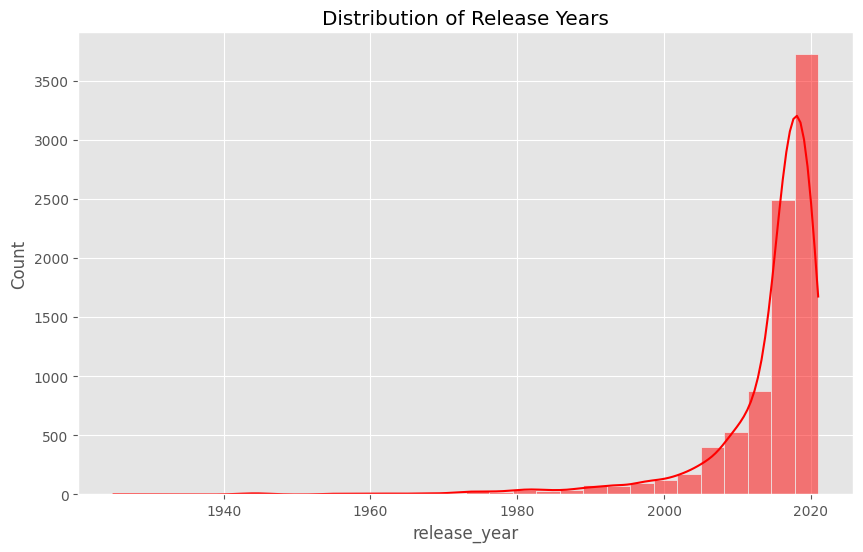

In [77]:
# Plot the release years distribution as histogram

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='release_year', bins=30, kde=True, color='red')
plt.title('Distribution of Release Years')
plt.show()

In [78]:
df['country'].value_counts()

country
United States                                             2809
India                                                      972
Country Unavailable                                        829
United Kingdom                                             418
Japan                                                      243
                                                          ... 
Germany, Canada, United States                               1
Denmark, United Kingdom, South Africa, Sweden, Belgium       1
Serbia, South Korea, Slovenia                                1
United Kingdom, Spain, Belgium                               1
South Africa, United States, Japan                           1
Name: count, Length: 749, dtype: int64

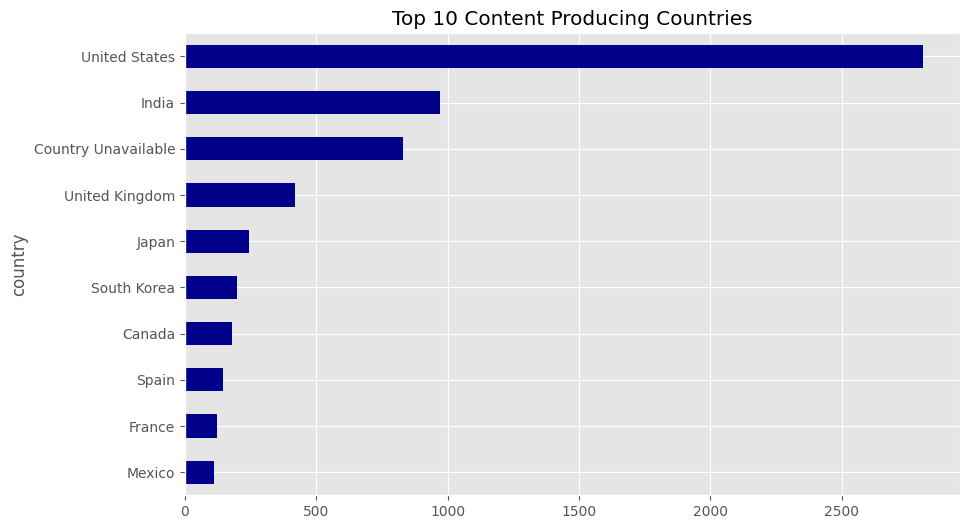

In [81]:
# Plot the top producing countries as horizontal bar chart

top_countries = df['country'].value_counts().head(10)

plt.figure(figsize=(10,6))
top_countries.plot(kind='barh', color='darkblue')
plt.title('Top 10 Content Producing Countries')
plt.gca().invert_yaxis() # Put #1 country to the top
plt.show()

In [82]:
df['rating'].value_counts()

rating
TV-MA       3205
TV-14       2157
TV-PG        861
R            799
PG-13        490
TV-Y7        333
TV-Y         306
PG           287
TV-G         220
NR            79
G             41
TV-Y7-FV       6
NC-17          3
UR             3
Name: count, dtype: int64

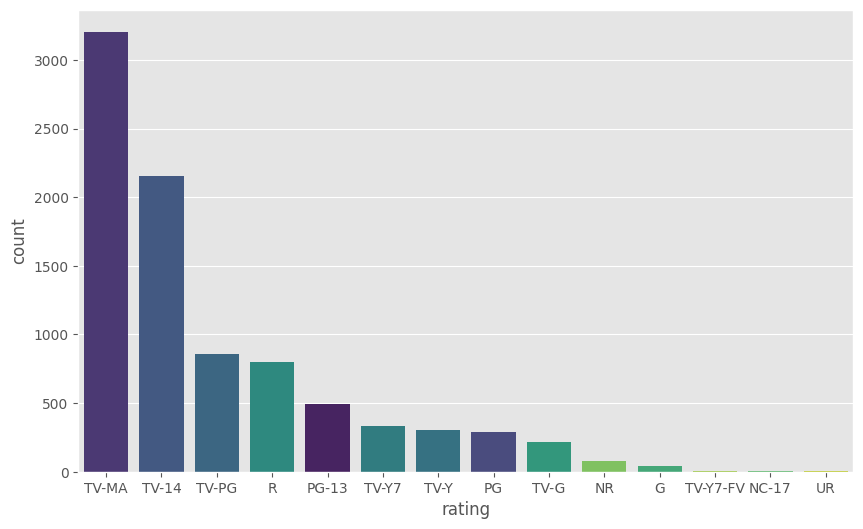

In [88]:
# Plot top ratings as bar chart

plt.figure(figsize=(10,6))

top_ratings = df['rating'].value_counts().index
sns.countplot(x='rating', data=df, order=top_ratings, palette='viridis', hue='rating', legend=False)
plt.show()

In [108]:
df['listed_in'].value_counts()

listed_in
Dramas, International Movies                                  362
Documentaries                                                 359
Stand-Up Comedy                                               334
Comedies, Dramas, International Movies                        274
Dramas, Independent Movies, International Movies              252
                                                             ... 
Dramas, Horror Movies, Sci-Fi & Fantasy                         1
British TV Shows, TV Dramas, TV Sci-Fi & Fantasy                1
Comedies, Cult Movies, Sports Movies                            1
Action & Adventure, Faith & Spirituality, Sci-Fi & Fantasy      1
Cult Movies, Dramas, Thrillers                                  1
Name: count, Length: 513, dtype: int64

In [112]:
# Split the strings into lists of genres
genre_list = df['listed_in'].str.split(', ')

# Explode the genre list
exploded_genres = genre_list.explode()

# Count the unique values
genre_counts = exploded_genres.value_counts()

print(genre_counts.head(5))

listed_in
International Movies      2752
Dramas                    2426
Comedies                  1674
International TV Shows    1349
Documentaries              869
Name: count, dtype: int64


/tmp/ipykernel_223324/853209456.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


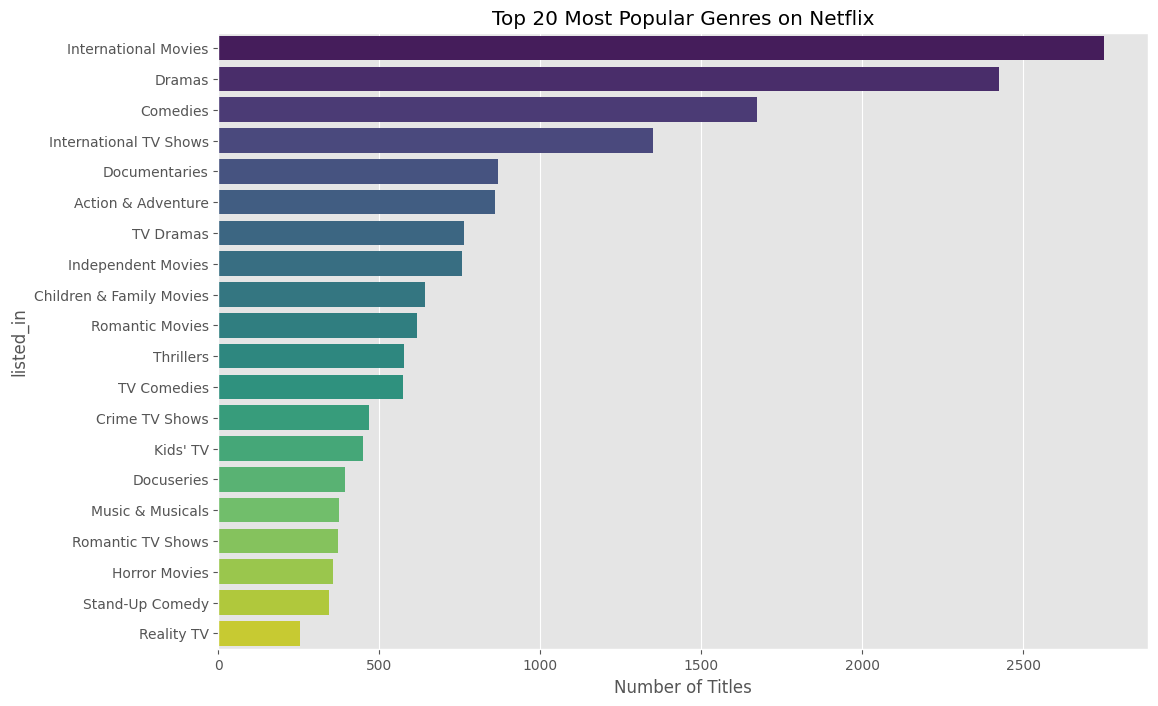

In [113]:
plt.figure(figsize=(12, 8))

# Plot the top 20 genres
sns.barplot(
    x=genre_counts.head(20).values, 
    y=genre_counts.head(20).index, 
    palette='viridis' # or 'mako', 'Reds'
)

plt.title('Top 20 Most Popular Genres on Netflix')
plt.xlabel('Number of Titles')
plt.show()

### Summary
* The data shows an exponential increase in content added in recent years, particularly from 2016 to 2020. This suggest that Netflix prioritizes more modern content
* The United States is the dominant content producer. India and the United Kingdom follow as the next largest contributors, highlighting Netflix's strategy to capture massive English-speaking and Bollywood markets.
* The most common ratings are TV-MA (Mature Audience) and TV-14. Netflix is primarily targeting teen and adult audiences rather than children.
* The most popular genre is "International Movie", but this isn't really a "genre" like Comedy; it's a classification tag Netflix uses for non-US content.

## Step 5: Feature Relationship (Bivariate Analysis)

Netflix started as a movie platform but shifted to TV Shows. For that we create a simple line char to visualize Movies vs. TV Shows over the years.

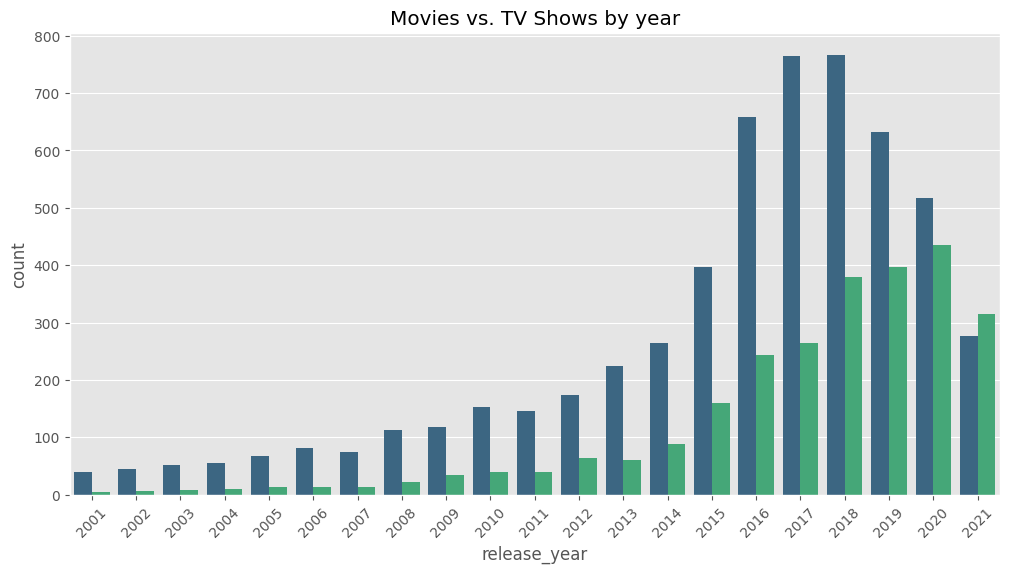

In [90]:
# Focus on recent years for better visibility
recent_df = df[df['release_year'] > 2000]

plt.figure(figsize=(12,6))
sns.countplot(x='release_year', hue='type', data=recent_df, palette='viridis', legend=False)
plt.title('Movies vs. TV Shows by year')
plt.xticks(rotation=45)
plt.show()

TV Shows might have different distribution of maturity rating compared to movies. For rating vs. type, a heatmap will be a good choice.

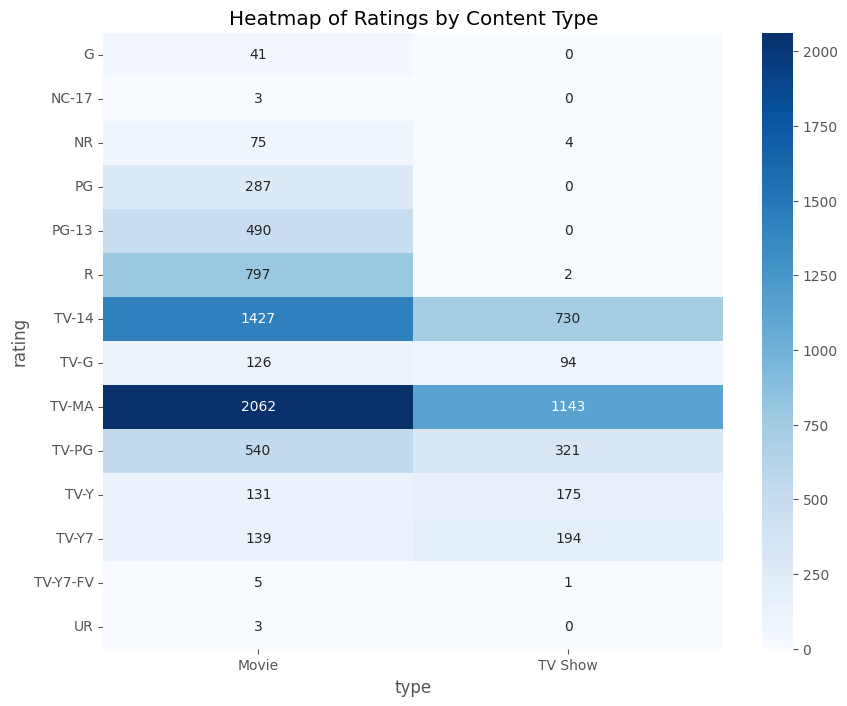

In [107]:
# Create a cross-tabulation table
rating_crosstab = pd.crosstab(df['rating'], df['type'])

plt.figure(figsize=(10, 8))
sns.heatmap(rating_crosstab, annot=True, fmt='d', cmap='Blues')
plt.title('Heatmap of Ratings by Content Type')
plt.show()

## Step 6: Conclusion
### Key Findings
* While Movies make up ~70% of the historical library, data from 2016–2021 reveals a strategic pivot. The number of TV Shows added annually has grown rapidly, narrowing the gap with Movies. This aligns with the "Binge-Watching" culture Netflix pioneered.
* The United States remains the top producer, but India is a dominant second player.
* The library is heavily skewed towards TV-MA (Mature Audiences) and TV-14. The volume of content for younger children (TV-Y) is lower, suggesting Netflix is prioritizing adult retention over being a primary "digital babysitter" compared to competitors like Disney+.
* "International Movies", "Dramas", and "Comedies" are the top genres. The high prevalence of the "International" tag confirms Netflix's aggressive localization strategy.